### Priprema i vizualizacija podataka
Fran Maznik JMBAG: 0036533639

In [362]:
import pandas as pd
import numpy as np

In [363]:
X = pd.read_csv('data/shot_logs.csv')
X.shape

(128069, 21)

In [364]:
X.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [365]:
X.columns.values

array(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN',
       'SHOT_NUMBER', 'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES',
       'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT',
       'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST',
       'FGM', 'PTS', 'player_name', 'player_id'], dtype=object)

In [366]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  122502 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

### Pojašnjenja značajki:

0. GAME_ID - jedinstveni identifikator igre.
1. MATCHUP - opis igre(informacije o datumu i ekipama)
2. LOCATION - mjesto na kojem se igrala utakmica (A za gostujuću ekipu, H za domaću ekipu).
3. W - rezultat utakmice (W za pobjedu, L za poraz).
4. FINAL_MARGIN - konačni rezultat utakmice, odnosno razlika u poenima između dviju ekipa.
5. SHOT_NUMBER - redni broj šuta u igri.
6. PERIOD -  četvrtina utakmice u kojoj se šut izvodi.
7. GAME_CLOCK - preostalo vrijeme u četvrtini kad je šut izveden.
8. SHOT_CLOCK - preostalo vrijeme za napad kad je šut izveden (0 - 24 s).
9. DRIBBLES - broj driblinga  prije izvođenja šuta.
10. TOUCH_TIME - vrijeme dodira lopte s igračem prije šuta.
11. SHOT_DIST - udaljenost šuta od koša.
12. PTS_TYPE - tip šuta (2 za dvojke, 3 za trice).
13. SHOT_RESULT - rezultat šuta (made za postignuti šut, missed za promašeni).
14. CLOSEST_DEFENDER - ime najbližeg obrambenog igrača.
15. CLOSEST_DEFENDER_PLAYER_ID - jedinstveni identifikator najbližeg obrambenog igrača.
16. CLOSE_DEF_DIST - udaljenost najbližeg obrambenog igrča od igrača koji izvodi šut.
17. FGM - značajka koja označava je li šut uspio (1 za uspješan, 0 za neuspješan).
18. PTS - broj poena postignutih šutom.
19. player_name - ime igrača koji izvodi šut.
20. player_id - jedinstveni identifikator igrača.






### Nedostajući podatci


In [367]:
X.isna().sum()

GAME_ID                          0
MATCHUP                          0
LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER                 0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
player_name                      0
player_id                        0
dtype: int64

SHOT_CLOCK ima nedostajuće vrijednosti. Prvo treba pretvoriti GAME_CLOCK iz stringa u integer.

In [368]:
def time_to_seconds(time_str):
    minutes, seconds = map(int, time_str.split(':'))
    total_seconds = minutes * 60 + seconds
    return total_seconds

X["GAME_CLOCK"] = X["GAME_CLOCK"].apply(time_to_seconds) 



Za razrješavanje nedostajućih vrijednosti SHOT_CLOCK imamo 2 slučaja
1.  GAME_CLOCK manji od SHOT_CLOCK - u SHOT_CLOCK upisujemo GAME_CLOCK
2.  OSTALI - uzimamo srednju vrijednost  SHOT_CLOCK-a

In [369]:
X[ (X.GAME_CLOCK <= 24) & (X.SHOT_CLOCK.isna())].shape[0]

3554

In [370]:
#1. slucaj
X.loc[(X.SHOT_CLOCK.isna()) & (X.GAME_CLOCK<=24) , 'SHOT_CLOCK'] = X['GAME_CLOCK']

In [371]:
X[ (X.SHOT_CLOCK.isna())].shape[0]

2013

In [372]:
#2. slucaj
X.loc[X.SHOT_CLOCK.isna(),'SHOT_CLOCK'] = round(X['SHOT_CLOCK'].mean(), 1)


In [373]:
X[ (X.SHOT_CLOCK.isna())].shape[0]


0

### Stršeći podatci

In [374]:
X_num = X.loc[:,[	"FINAL_MARGIN"	,"SHOT_NUMBER",	"PERIOD",	"GAME_CLOCK",	"SHOT_CLOCK",	"DRIBBLES",	"TOUCH_TIME",	"SHOT_DIST",	"PTS_TYPE",	"CLOSE_DEF_DIST",	"FGM",	"PTS"	]]
X_num.describe()

,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,FGM,PTS
count,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,0.208723,6.506899,2.469427,351.393811,12.221990,2.023355,2.765901,13.571504,2.264670,4.123015,0.452139,0.997314
std,13.233267,4.713260,1.139919,207.590603,5.854602,3.477760,3.043682,8.888964,0.441159,2.756446,0.497706,1.130978
min,-53.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,-8.000000,3.000000,1.000000,172.000000,8.000000,0.000000,0.900000,4.700000,2.000000,2.300000,0.000000,0.000000
50%,1.000000,5.000000,2.000000,352.000000,12.200000,1.000000,1.600000,13.700000,2.000000,3.700000,0.000000,0.000000
75%,9.000000,9.000000,3.000000,531.000000,16.400000,2.000000,3.700000,22.500000,3.000000,5.300000,1.000000,2.000000
max,53.000000,38.000000,7.000000,720.000000,24.000000,32.000000,24.900000,47.200000,3.000000,53.200000,1.000000,3.000000


In [375]:
import matplotlib.pyplot as plt
import seaborn as sns

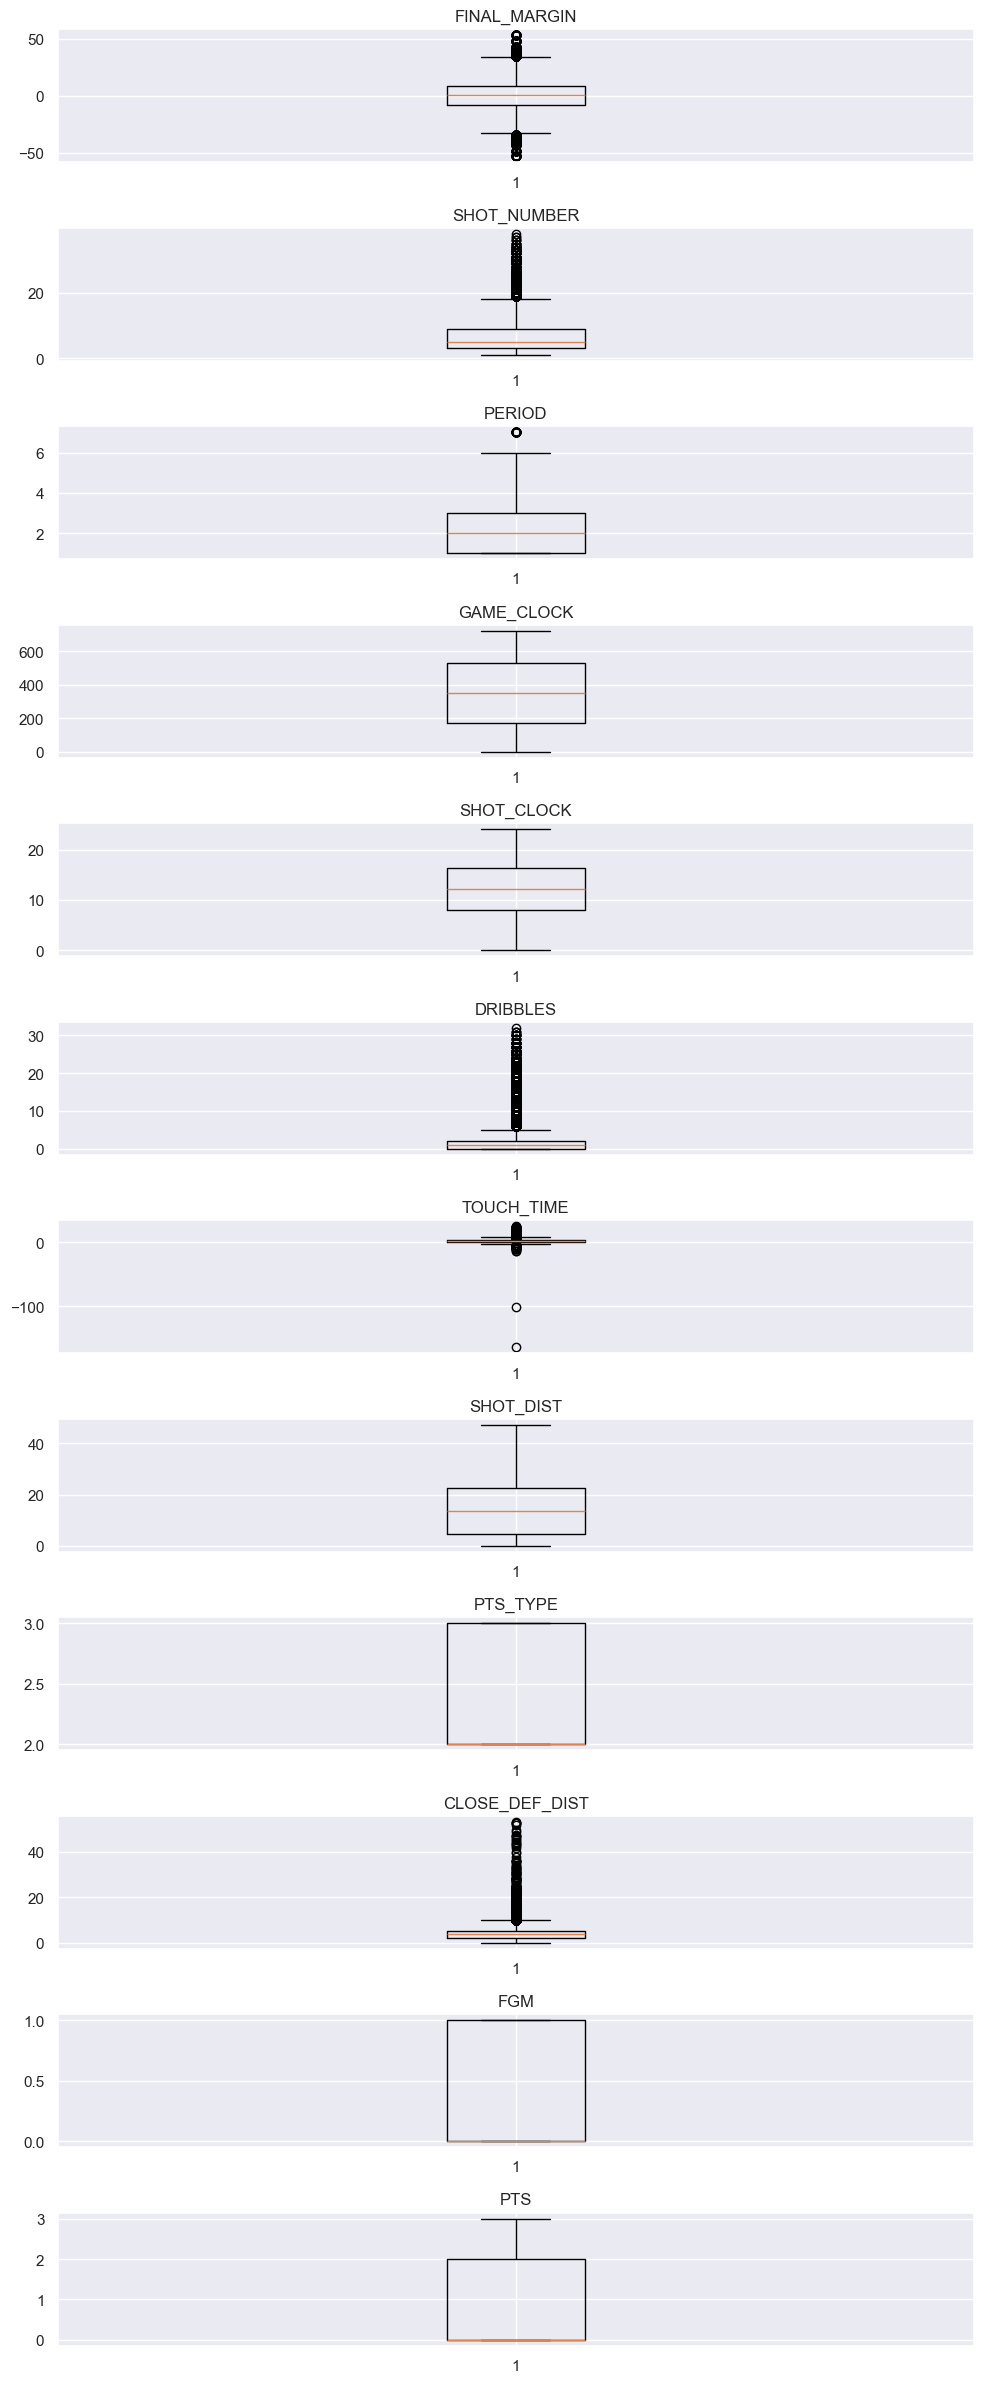

In [376]:


fig, axes = plt.subplots(nrows=len(X_num.columns), figsize=(10, 2*len(X_num.columns)))

for i, column in enumerate(X_num.columns):
    axes[i].boxplot(X_num[column], vert=True)
    axes[i].set_title(column)
    axes[i].grid(True)

plt.tight_layout()

plt.show()


TOUCH_TIME(vrijeme dodira lopte prije šuta) ima vrijednosti < 0

In [377]:
with pd.option_context('display.max_columns', None):
    display(X.loc[X['TOUCH_TIME'] < 0, :])

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
748,21400625,"JAN 21, 2015 - CHA vs. MIA",H,W,2,7,4,475,9.0,0,-4.3,7.5,2,made,"Napier, Shabazz",203894,3.9,1,2,al jefferson,2744
775,21400459,"DEC 29, 2014 - CHA vs. MIL",H,L,-10,12,4,454,6.3,0,-0.4,4.1,2,missed,"Henson, John",203089,0.1,0,0,al jefferson,2744
1043,21400195,"NOV 23, 2014 - CHA @ MIA",A,L,-1,17,4,2,2.0,0,-2.3,1.3,2,missed,"Williams, Shawne",200761,1.3,0,0,al jefferson,2744
1118,21400130,"NOV 14, 2014 - CHA @ PHX",A,W,8,7,2,336,17.7,0,-3.2,5.0,2,made,"Plumlee, Miles",203101,3.7,1,2,al jefferson,2744
1260,21400028,"NOV 01, 2014 - CHA vs. MEM",H,L,-2,9,3,660,23.7,0,-1.3,8.4,2,missed,"Conley, Mike",201144,0.6,0,0,al jefferson,2744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124820,21400590,"JAN 16, 2015 - BKN @ WAS",A,W,22,10,3,571,16.8,0,-4.2,1.9,2,missed,"Gortat, Marcin",101162,0.0,0,0,mason plumlee,203486
125018,21400266,"DEC 03, 2014 - BKN vs. SAS",H,W,2,3,4,498,19.5,0,-1.2,3.8,2,missed,"Bonner, Matt",2588,1.0,0,0,mason plumlee,203486
125057,21400116,"NOV 12, 2014 - BKN @ PHX",A,L,-8,2,4,583,14.3,0,-8.8,3.2,2,missed,"Morris, Marcus",202694,2.0,0,0,mason plumlee,203486
125059,21400090,"NOV 09, 2014 - BKN vs. ORL",H,W,8,2,2,680,21.6,0,-0.4,3.4,2,missed,"Frye, Channing",101112,2.0,0,0,mason plumlee,203486


In [378]:
outliers = X[X.TOUCH_TIME < 0]

In [379]:
outliers.shape

(312, 21)

In [380]:
X = X.drop(outliers.index)

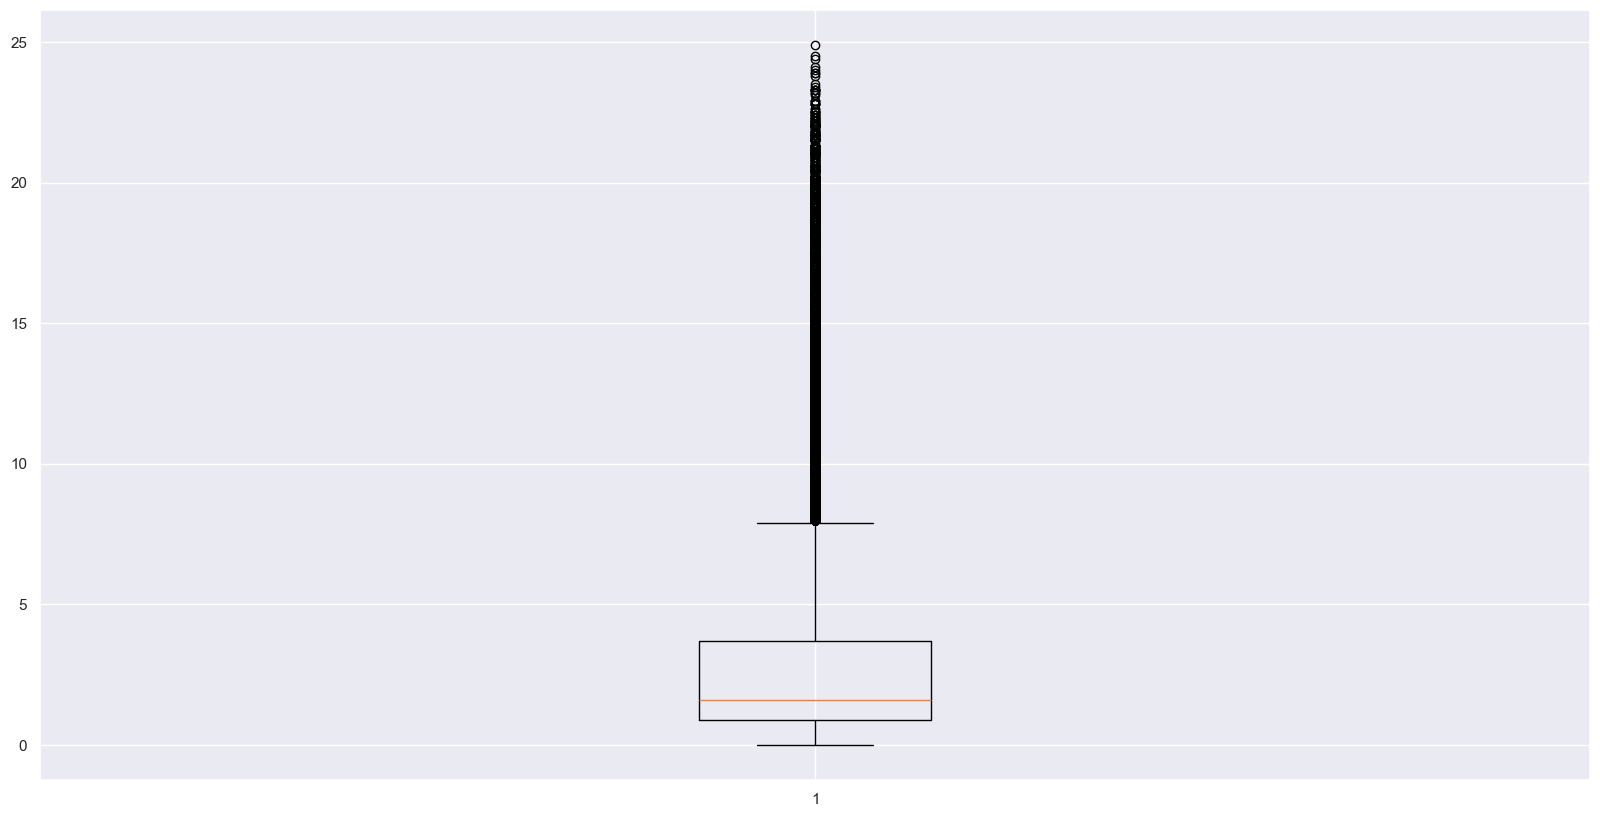

In [381]:
plt.boxplot(X.TOUCH_TIME)
plt.show()

### Vizualizacija

<Axes: >

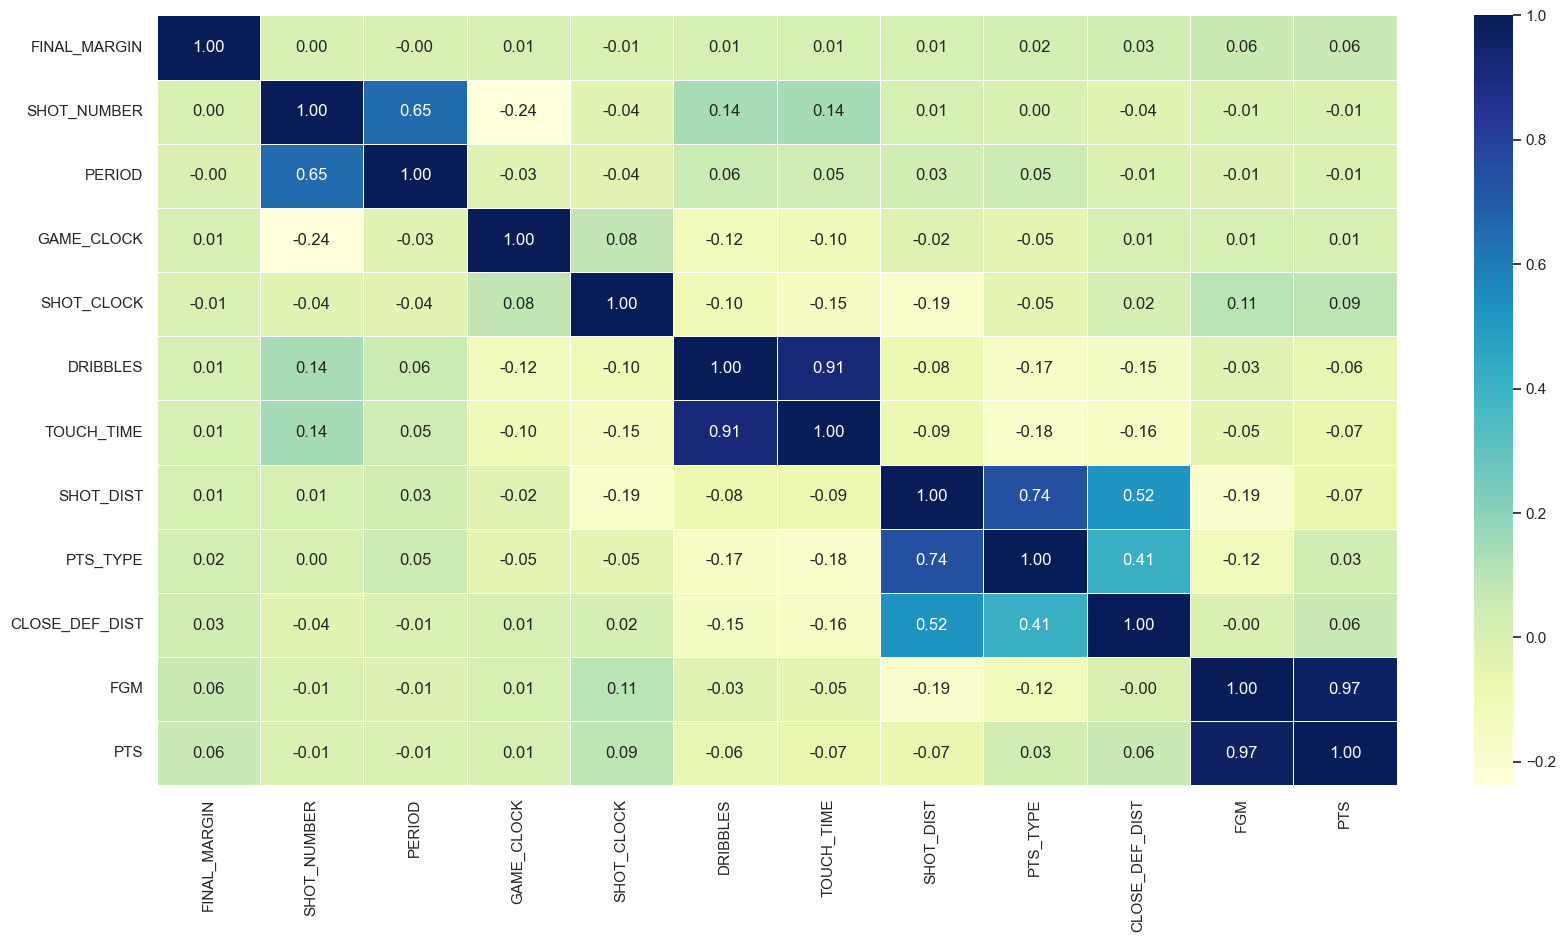

In [382]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(X_num.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)

Visko korelirane značajke 
- TOUCH_TIME I DRIBBLES
- FGM i PTS




In [389]:
X.drop("PTS", axis=1, inplace=True)

In [390]:
X.drop("TOUCH_TIME", axis=1, inplace=True)

<Axes: >

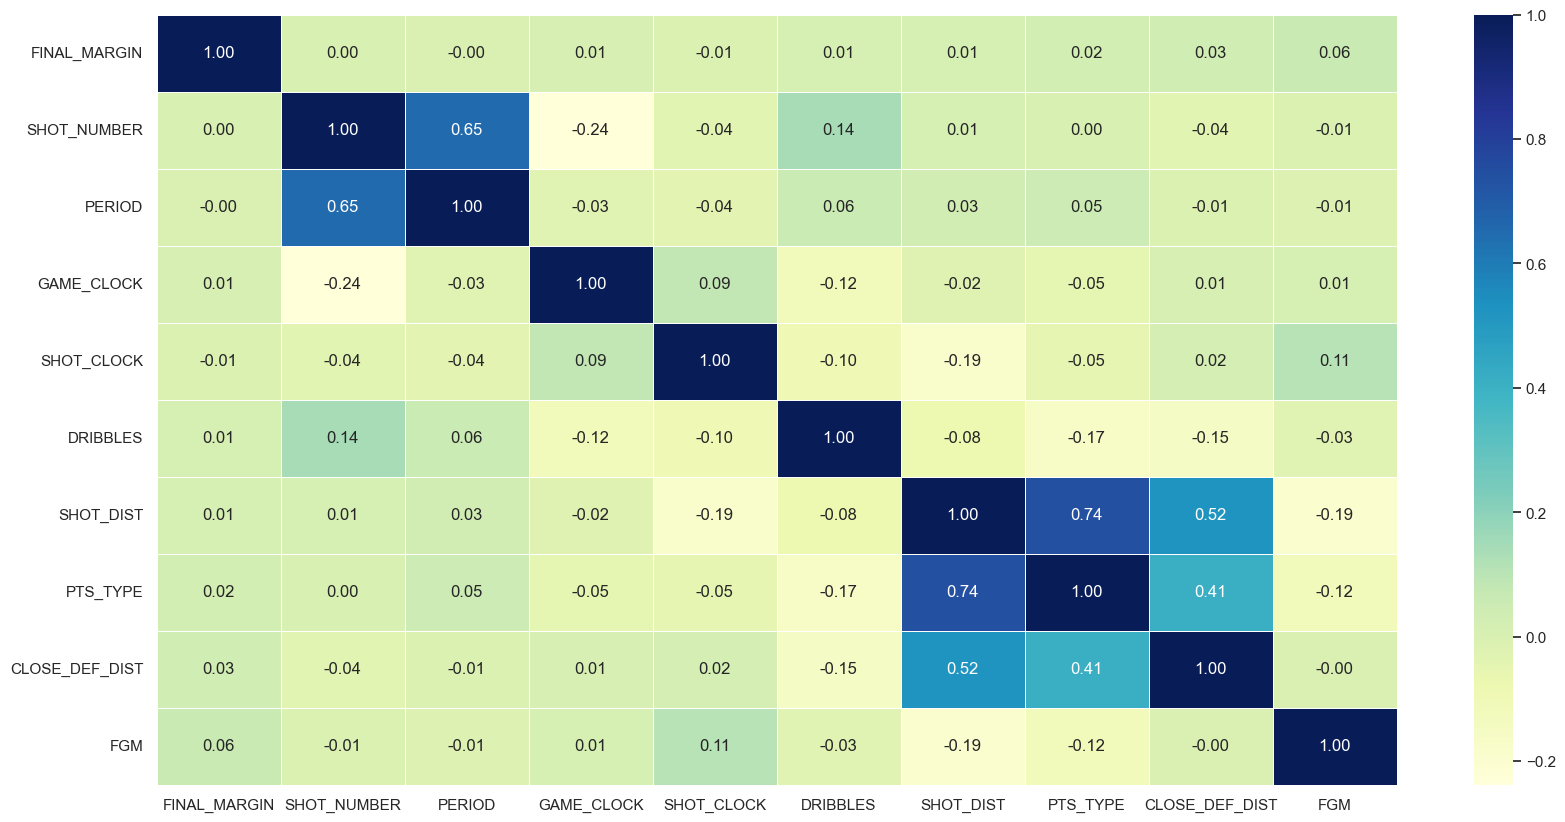

In [392]:
X_num = X.loc[:,[	"FINAL_MARGIN"	,"SHOT_NUMBER",	"PERIOD",	"GAME_CLOCK",	"SHOT_CLOCK",	"DRIBBLES",	"SHOT_DIST",	"PTS_TYPE",	"CLOSE_DEF_DIST",	"FGM"	]]
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(X_num.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)

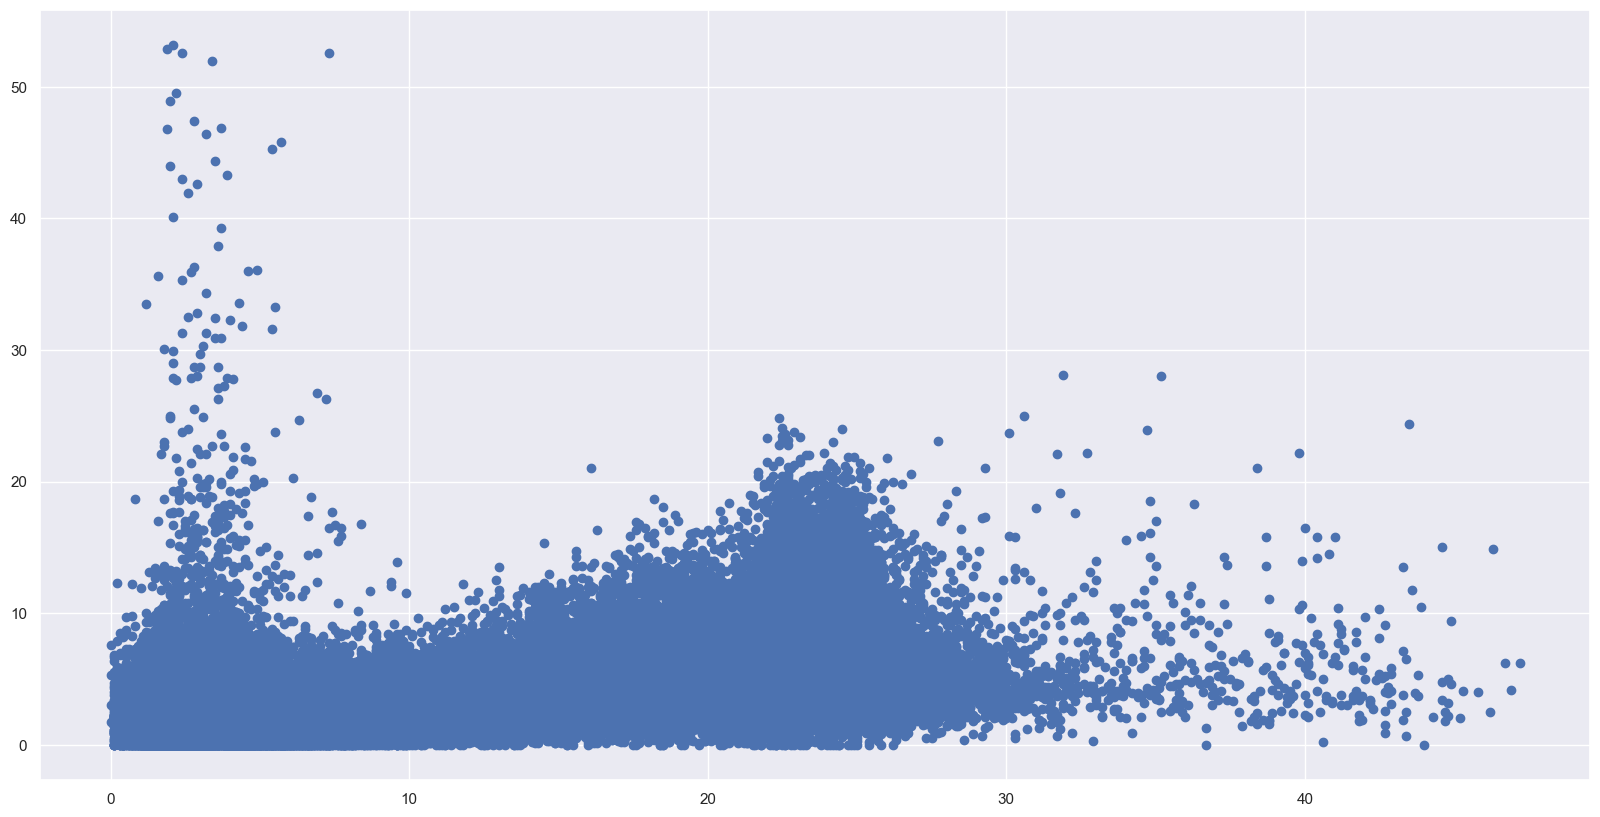

In [393]:
plt.scatter(X.SHOT_DIST, X.CLOSE_DEF_DIST)